In [85]:
#standard
import re

#3rd party
import numpy as np
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 50

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

from sklearn.model_selection import train_test_split

import miceforest as mf

import catboost
import lightgbm

#local
from configs import DATA_PATH

SEED = 1998
np.random.seed(SEED)

# Load data

In [2]:
data = pd.read_csv(DATA_PATH, index_col=0)
# print(len(data))
# data = data.dropna()
print(len(data))

11086


In [3]:
data.columns = [re.sub("\(\)", "", column) for column in data.columns]
data.columns = [re.sub("\-|\,", "_", column) for column in data.columns]

data[["Activity", "subject"]] = data[["Activity", "subject"]].astype("category")

In [79]:
X, y = data.iloc[:,1:], data.iloc[:,0]
indices = np.random.randint(0, len(X), )
X_sample = X.sample(frac=0.25)
y_sample = y[X_sample.index.tolist()]

In [86]:
sorted(data.columns)

['Activity',
 'angle(X_gravityMean)',
 'angle(Y_gravityMean)',
 'angle(Z_gravityMean)',
 'angle(tBodyAccJerkMean)_gravityMean)',
 'angle(tBodyAccMean_gravity)',
 'angle(tBodyGyroJerkMean_gravityMean)',
 'angle(tBodyGyroMean_gravityMean)',
 'energy_mean',
 'fBodyAccJerk_bandsEnergy_17_24',
 'fBodyAccJerk_bandsEnergy_17_24.1',
 'fBodyAccJerk_bandsEnergy_17_24.2',
 'fBodyAccJerk_bandsEnergy_17_32',
 'fBodyAccJerk_bandsEnergy_17_32.1',
 'fBodyAccJerk_bandsEnergy_17_32.2',
 'fBodyAccJerk_bandsEnergy_1_16',
 'fBodyAccJerk_bandsEnergy_1_16.1',
 'fBodyAccJerk_bandsEnergy_1_16.2',
 'fBodyAccJerk_bandsEnergy_1_24',
 'fBodyAccJerk_bandsEnergy_1_24.1',
 'fBodyAccJerk_bandsEnergy_1_24.2',
 'fBodyAccJerk_bandsEnergy_1_8',
 'fBodyAccJerk_bandsEnergy_1_8.1',
 'fBodyAccJerk_bandsEnergy_1_8.2',
 'fBodyAccJerk_bandsEnergy_25_32',
 'fBodyAccJerk_bandsEnergy_25_32.1',
 'fBodyAccJerk_bandsEnergy_25_32.2',
 'fBodyAccJerk_bandsEnergy_25_48',
 'fBodyAccJerk_bandsEnergy_25_48.1',
 'fBodyAccJerk_bandsEnergy_25_4

# Exploratory data analysis

Nans checkout

In [7]:
X.isna().sum().sort_values(ascending=False)

fBodyGyro_bandsEnergy_33_48    84
fBodyAcc_bandsEnergy_49_56     79
fBodyAccJerk_std_Y             77
tBodyAccMag_sma                77
fBodyAccMag_iqr                76
                               ..
fBodyBodyGyroMag_entropy       41
tGravityAcc_std_X              40
fBodyAcc_main_Z                39
fBodyAcc_entropy_Y             38
subject                         0
Length: 571, dtype: int64

In [11]:
nans_sorted = X.T.isna().sum().sort_values(ascending=False)
nans_sorted[nans_sorted > 0]

6220    40
804     40
3536    40
5397    40
3036    40
        ..
6380     5
6507     5
9638     5
3910     5
8877     4
Length: 1462, dtype: int64

In [69]:
X.corrwith(X.iloc[:,2])
    

angle(X_gravityMean)                    0.736284
angle(Y_gravityMean)                    0.643072
angle(Z_gravityMean)                    1.000000
angle(tBodyAccJerkMean)_gravityMean)   -0.364000
angle(tBodyAccMean_gravity)            -0.053819
                                          ...   
tGravityAccMag_mean                    -0.522131
tGravityAccMag_min                     -0.479694
tGravityAccMag_sma                      0.175434
tGravityAccMag_std                      0.503870
void                                    0.306573
Length: 570, dtype: float64

In [53]:
idx = nans_sorted[nans_sorted == 40].index[1]

In [54]:
seria = X.loc[idx, :]

In [55]:
seria[seria.isna()].index

Index(['angle(Z_gravityMean)', 'fBodyAcc_bandsEnergy_25_48',
       'fBodyAcc_bandsEnergy_33_40.1', 'fBodyAcc_bandsEnergy_49_56.2',
       'fBodyAccJerk_bandsEnergy_17_32', 'fBodyAccJerk_bandsEnergy_57_64',
       'fBodyAccJerk_energy_X', 'fBodyAccJerk_meanFreq_X',
       'fBodyAccJerk_skewness_Y', 'fBodyAccJerk_std_Z', 'fBodyAccMag_mean',
       'fBodyBodyGyroMag_min', 'fBodyGyro_bandsEnergy_1_16.2',
       'fBodyGyro_bandsEnergy_1_8.2', 'fBodyGyro_bandsEnergy_33_48',
       'fBodyGyro_iqr_Y', 'fBodyGyro_max_X', 'tBodyAcc_arCoeff_Z_3',
       'tBodyAcc_mad_Y', 'tBodyAcc_max_Y', 'tBodyAccJerk_arCoeff_Z_2',
       'tBodyAccJerk_correlation_X_Y', 'tBodyAccJerk_mad_Y',
       'tBodyAccJerk_max_Y', 'tBodyAccJerkMag_energy', 'tBodyGyro_arCoeff_Z_4',
       'tBodyGyro_low_Y', 'tBodyGyro_low_Z', 'tBodyGyro_mean_Y',
       'tBodyGyro_mean_Z', 'tBodyGyro_min_X', 'tBodyGyroJerk_arCoeff_Z_4',
       'tBodyGyroJerk_mad_X', 'tBodyGyroJerk_max_X', 'tBodyGyroMag_arCoeff2',
       'tBodyGyroMag_entrop

In [38]:
X.loc[6220, (X.iloc[6220,:].isna() == True).index]

angle(X_gravityMean)                   -1.574029
angle(Y_gravityMean)                   -0.766164
angle(Z_gravityMean)                   -2.446730
angle(tBodyAccJerkMean)_gravityMean)   -1.949025
angle(tBodyAccMean_gravity)            -0.113787
                                          ...   
tGravityAccMag_mean                    -0.809719
tGravityAccMag_min                     -0.478636
tGravityAccMag_sma                      0.722631
tGravityAccMag_std                     -0.668744
void                                    3.000000
Name: 6220, Length: 571, dtype: float64

In [32]:
X.loc[6220, :]

angle(X_gravityMean)                   -1.574029
angle(Y_gravityMean)                   -0.766164
angle(Z_gravityMean)                   -2.446730
angle(tBodyAccJerkMean)_gravityMean)   -1.949025
angle(tBodyAccMean_gravity)            -0.113787
                                          ...   
tGravityAccMag_mean                    -0.809719
tGravityAccMag_min                     -0.478636
tGravityAccMag_sma                      0.722631
tGravityAccMag_std                     -0.668744
void                                    3.000000
Name: 6220, Length: 571, dtype: float64

Cardinality checkout

In [8]:
data["Activity"].unique()

['STANDING', 'WALKING_UPSTAIRS', 'LAYING', 'WALKING', 'SITTING', 'WALKING_DOWNSTAIRS']
Categories (6, object): ['STANDING', 'WALKING_UPSTAIRS', 'LAYING', 'WALKING', 'SITTING', 'WALKING_DOWNSTAIRS']

In [10]:
pd.DataFrame(X.nunique().sort_values(ascending=False)).T

,energy_mean,tBodyGyro_low_Y,tGravityAccMag_sma,fBodyAcc_main_Z,tGravityAccMag_mad,tBodyGyro_correlation_X_Y,tBodyGyro_arCoeff_Z_4,tBodyGyro_arCoeff_Z_3,tBodyGyro_arCoeff_Z_2,tBodyGyro_arCoeff_Z_1,tBodyGyro_arCoeff_Y_2,tBodyGyro_arCoeff_Y_1,tBodyGyro_arCoeff_X_4,tBodyGyro_arCoeff_X_3,tBodyGyro_arCoeff_X_2,fBodyBodyGyroJerkMag_meanFreq,angle(X_gravityMean),tBodyGyro_correlation_X_Z,tBodyAccMag_arCoeff4,tBodyAccMag_arCoeff3,tBodyAccMag_arCoeff2,tBodyAccMag_arCoeff1,fBodyBodyGyroMag_kurtosis,fBodyBodyGyroMag_mad,fBodyBodyGyroMag_meanFreq,fBodyBodyGyroMag_skewness,tBodyAccJerkMag_arCoeff4,tBodyAccJerkMag_arCoeff3,tBodyAccJerkMag_arCoeff2,fBodyBodyGyroJerkMag_skewness,fBodyBodyGyroJerkMag_kurtosis,tBodyGyro_correlation_Y_Z,tBodyGyro_mean_Z,tBodyGyroJerk_arCoeff_Z_1,tBodyGyroJerk_arCoeff_Y_4,tBodyGyroJerk_arCoeff_Y_3,tBodyGyroJerk_arCoeff_X_4,tBodyGyroJerk_arCoeff_X_3,tBodyGyroJerk_arCoeff_X_2,tBodyGyro_std_Z,fBodyAccMag_meanFreq,tBodyGyro_sma,fBodyAccMag_skewness,tBodyGyro_mean_Y,fBodyGyro_kurtosis_X,tBodyAcc_arCoeff_Z_2,fBodyAccMag_std,fBodyBodyAccJerkMag_kurtosis,tBodyGyro_mad_X,tBodyGyro_low_Z,tBodyGyro_low_X,fBodyBodyAccJerkMag_mad,fBodyBodyAccJerkMag_meanFreq,fBodyBodyAccJerkMag_skewness,fBodyBodyAccJerkMag_std,tBodyAccJerkMag_arCoeff1,tBodyAccJerk_mean_Z,fBodyGyro_kurtosis_Y,tBodyAcc_arCoeff_X_2,tBodyAcc_sma,fBodyGyro_skewness_Y,fBodyGyro_skewness_Z,fBodyGyro_sma,tBodyAcc_mean_Z,tBodyAcc_mean_Y,shadow_gravity_angle,tBodyAcc_mad_Z,tBodyAcc_mad_Y,tBodyAcc_arCoeff_X_1,tBodyAcc_arCoeff_X_3,fBodyGyro_skewness_X,tBodyAcc_arCoeff_X_4,tBodyAcc_arCoeff_Y_1,tBodyAcc_arCoeff_Y_2,tBodyAcc_arCoeff_Y_3,tBodyAcc_arCoeff_Y_4,tBodyAcc_arCoeff_Z_1,tBodyAcc_correlation_Y_Z,tBodyAcc_correlation_X_Z,tBodyAcc_correlation_X_Y,tBodyAcc_arCoeff_Z_4,tBodyAcc_std_X,tBodyAcc_std_Z,tBodyGyroJerk_arCoeff_Z_4,tBodyAccJerk_correlation_X_Y,tBodyAccJerk_mean_Y,tBodyAccJerk_mean_X,fBodyGyro_mad_Y,fBodyGyro_mad_Z,tBodyAccJerk_mad_Y,fBodyGyro_max_Y,fBodyGyro_meanFreq_Y,fBodyGyro_meanFreq_Z,tBodyAccJerk_correlation_Y_Z,tBodyAccJerk_correlation_X_Z,tBodyAccJerk_arCoeff_Z_4,tBodyAccJerk_arCoeff_X_1,tBodyAccJerk_arCoeff_Z_3,tBodyAccJerk_arCoeff_Z_2,tBodyAccJerk_arCoeff_Z_1,tBodyAccJerk_arCoeff_Y_4,tBodyAccJerk_arCoeff_Y_3,tBodyAccJerk_arCoeff_Y_2,tBodyAccJerk_arCoeff_Y_1,tBodyAccJerk_arCoeff_X_4,tBodyAccJerk_arCoeff_X_3,tBodyAccJerk_arCoeff_X_2,tBodyGyroJerk_arCoeff_Z_2,tBodyAcc_arCoeff_Z_3,fBodyAcc_skewness_Z,fBodyAcc_max_Z,tGravityAcc_correlation_X_Z,tGravityAcc_correlation_Y_Z,fBodyAccJerk_kurtosis_X,fBodyAcc_meanFreq_Y,fBodyAcc_meanFreq_X,fBodyAccJerk_kurtosis_Z,fBodyAcc_main_Y,tGravityAcc_arCoeff_Z_3,fBodyAcc_main_X,tBodyGyroJerkMag_arCoeff4,tGravityAcc_arCoeff_X_1,tBodyGyroJerkMag_arCoeff2,tBodyGyroJerkMag_arCoeff1,fBodyAccJerk_mean_X,tGravityAcc_arCoeff_Z_4,fBodyAcc_meanFreq_Z,tGravityAcc_mean_X,fBodyAcc_skewness_Y,tBodyGyroMag_sma,fBodyAcc_min_Z,tGravityAcc_arCoeff_X_2,tGravityAcc_arCoeff_X_4,tBodyGyroMag_mean,fBodyAcc_skewness_X,tGravityAcc_arCoeff_Y_1,tGravityAcc_arCoeff_Z_1,tGravityAcc_arCoeff_Y_2,tBodyGyroMag_arCoeff4,tGravityAcc_arCoeff_Y_3,tBodyGyroMag_arCoeff3,tGravityAcc_arCoeff_Y_4,tBodyGyroMag_arCoeff1,fBodyAcc_kurtosis_Z,tBodyGyroJerkMag_arCoeff3,tGravityAcc_mean_Y,tGravityAccMag_arCoeff4,fBodyAccJerk_skewness_Y,fBodyAccJerk_meanFreq_X,angle(tBodyGyroMean_gravityMean),angle(tBodyGyroJerkMean_gravityMean),tGravityAccMag_arCoeff1,tGravityAccMag_arCoeff2,tGravityAccMag_arCoeff3,angle(tBodyAccMean_gravity),tGravityAcc_sma,angle(tBodyAccJerkMean)_gravityMean),fBodyAccMag_iqr,fBodyAccMag_kurtosis,angle(Z_gravityMean),angle(Y_gravityMean),tBodyGyroJerk_correlation_Y_Z,tBodyGyroJerk_correlation_X_Z,fBodyAccJerk_skewness_X,fBodyAccJerk_skewness_Z,tBodyGyroMag_std,tBodyGyroJerk_mean_X,fBodyAcc_kurtosis_X,tGravityAcc_mean_Z,fBodyAccJerk_meanFreq_Y,fBodyAcc_kurtosis_Y,fBodyAccJerk_min_Y,tBodyGyroJerk_mean_Y,fBodyAccJerk_meanFreq_Z,tGravityAccMag_iqr,fBodyAcc_mad_Z,tGravityAccMag_mean,fBodyGyro_mad_X,tGravityAcc_arCoeff_X_3,fBodyGyro_std_Z,fBodyGyro_kurtosis_Z

In [11]:
summary = ss.describe(X, axis=0, nan_policy="omit")[1:]
#min, max columns
min_col, max_col = summary[0][0], summary[0][1]

summary = pd.DataFrame([min_col, max_col, *summary[1:]], columns=X.columns).T
summary.columns = ["min","max", "mean", "variance", "skewness", "kurtosis"]
summary

,min,max,mean,variance,skewness,kurtosis
angle(X_gravityMean),-1.577122,-1.536682,-1.566967,0.000097,1.371709,0.279054
angle(Y_gravityMean),-1.839413,0.720197,-0.618666,0.109445,1.233566,1.354892
angle(Z_gravityMean),-2.562914,-2.345198,-2.446406,0.001093,0.849866,0.197656
angle(tBodyAccJerkMean)_gravityMean),-2.012415,-1.714677,-1.860302,0.004962,0.131068,-0.823368
angle(tBodyAccMean_gravity),-0.702915,0.845884,0.091439,0.057011,-0.211611,1.568304
...,...,...,...,...,...,...
tGravityAccMag_mean,-0.945475,-0.665371,-0.884697,0.004136,0.448214,-1.386103
tGravityAccMag_min,-1.044689,1.335166,-0.815300,0.071544,0.905999,0.031662
tGravityAccMag_sma,-2.490387,3.790841,1.200645,5.427193,-0.462321,-1.439950
tGravityAccMag_std,-4.343592,2.114257,0.741315,2.209293,-0.668490,-0.844378


In [ ]:
X.isnan

In [80]:
summary.sort_values("kurtosis", ascending=False)

,min,max,mean,variance,skewness,kurtosis
fBodyAccJerk_bandsEnergy_57_64,-1.956628,7.385268,7.318640,0.066825,-14.513457,365.899117
fBodyGyro_bandsEnergy_33_40.1,0.710108,3.800883,3.767663,0.008182,-12.755037,314.060075
tBodyAcc_mean_Y,-3.983011,1.082304,-0.953798,0.007374,-3.041414,248.857378
fBodyGyro_bandsEnergy_33_48.1,-7.521472,-2.576584,-2.639233,0.025545,-10.605258,227.162409
fBodyGyro_bandsEnergy_33_40.2,-1.966350,-1.131776,-1.143936,0.000747,-9.720332,199.067679
...,...,...,...,...,...,...
fBodyAccMag_entropy,1.910602,3.805075,3.050231,0.416804,-0.156386,-1.780991
tBodyAccJerk_entropy_X,4.576505,9.059646,6.937437,2.149504,-0.133229,-1.785671
fBodyAcc_entropy_X,-4.577129,0.086024,-1.769314,2.724397,-0.164870,-1.799705
fBodyAccJerk_entropy_X,2.747233,4.097324,3.611175,0.251584,-0.243621,-1.825509


In [13]:
X["subject"].nunique()

30

In [14]:
X.nunique().sort_values(ascending=True)

void                      3
fBodyAcc_maxInds_Y       22
fBodyGyro_maxInds_Z      23
fBodyAcc_maxInds_Z       25
fBodyGyro_maxInds_X      26
                       ... 
tGravityAccMag_mad     7639
fBodyAcc_main_Z        7639
tGravityAccMag_sma     7648
tBodyGyro_low_Y        7797
energy_mean            7803
Length: 571, dtype: int64

### Plot activity on number of occurances per subject 

In [15]:
subjects_count = data[["subject","Activity"]].groupby(["subject"]).count().reset_index()

In [16]:
subjects_groups = data[["subject","Activity", "void" ]].groupby(["subject", "Activity"]).count().reset_index()

In [17]:
activities_subjects = data[["subject","Activity"]].groupby(["Activity"]).count().reset_index()

In [18]:
subjects_groups

,subject,Activity,void
0,1,LAYING,18
1,1,SITTING,45
2,1,STANDING,39
3,1,WALKING,94
4,1,WALKING_DOWNSTAIRS,50
...,...,...,...
175,30,SITTING,58
176,30,STANDING,40
177,30,WALKING,61
178,30,WALKING_DOWNSTAIRS,53


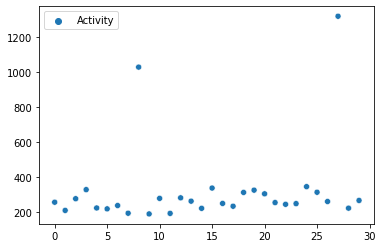

In [21]:
subjects_sorted = subjects_count.sort_index()
sns.scatterplot(data=subjects_sorted)
plt.show()

In [22]:
subjects_groups["subject"].nunique()

30

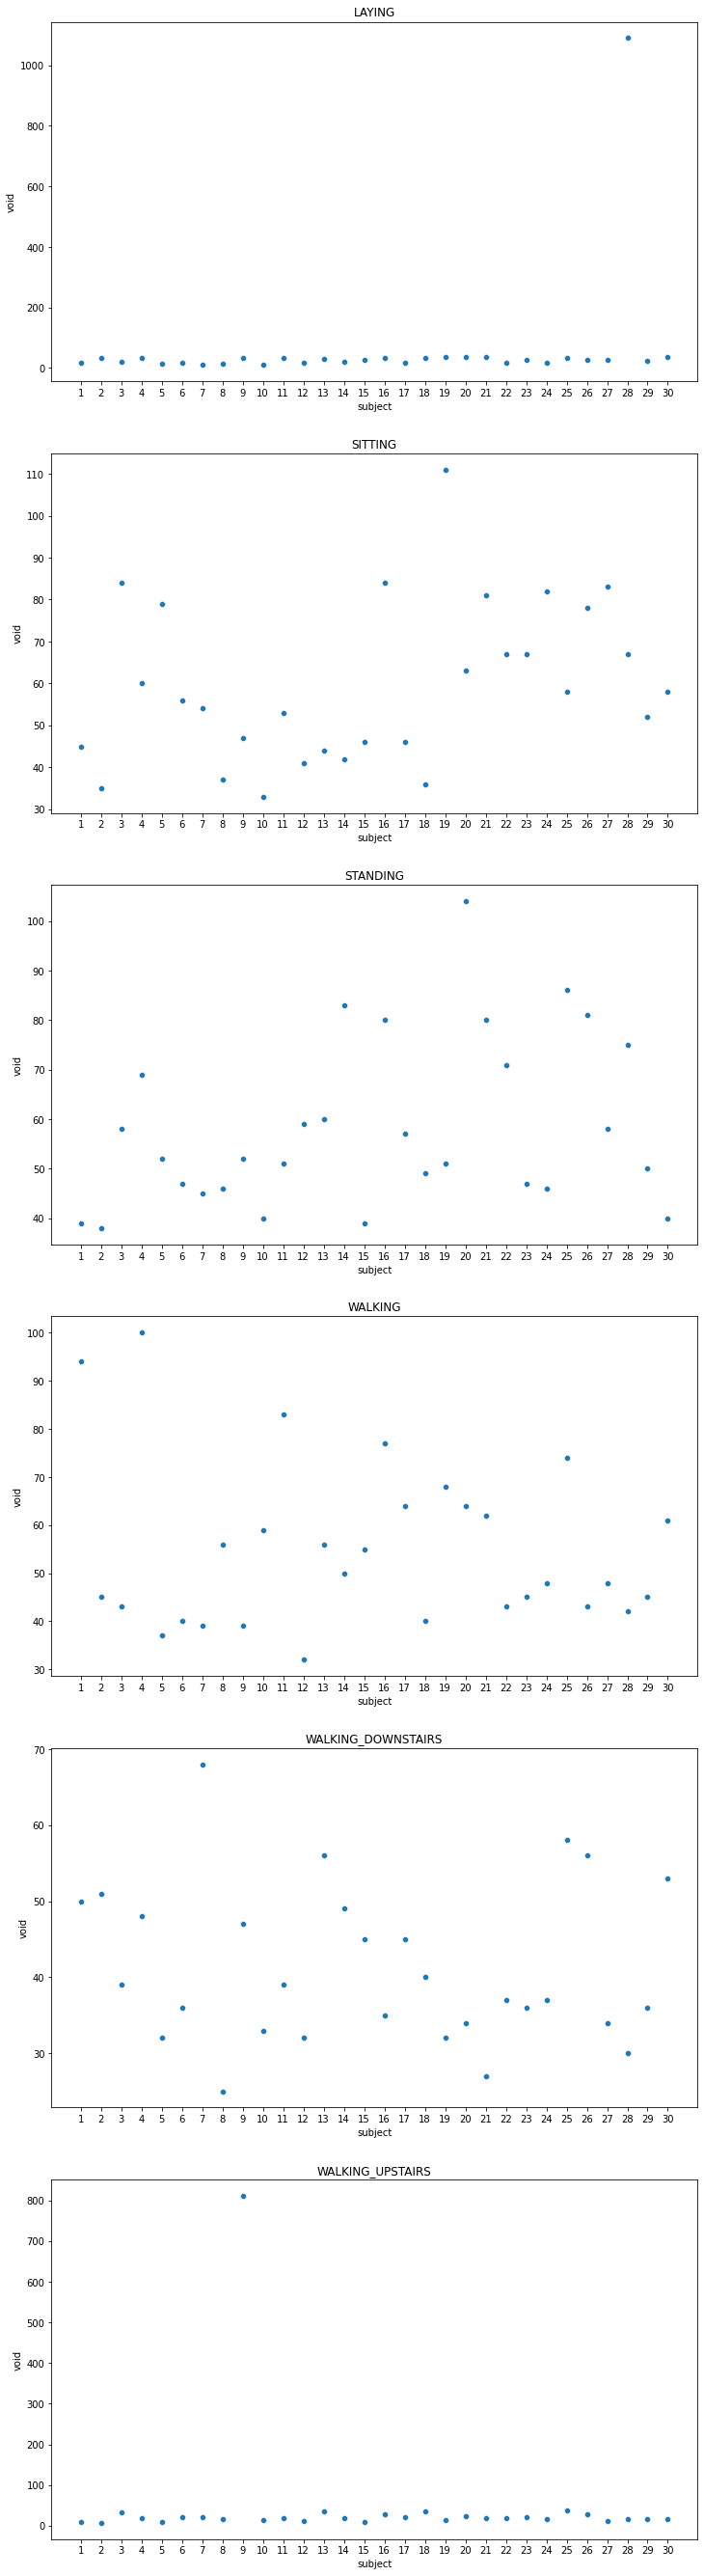

In [23]:
n = len(subjects_groups["Activity"].unique())

fix, ax = plt.subplots(n, 1, figsize=(12, len(subjects_groups["Activity"].unique())*8))

for axi, activity in zip(ax, subjects_groups["Activity"].unique()):
    sns.scatterplot(x="subject", y="void", data=subjects_groups[subjects_groups["Activity"]==activity], ax=axi)
    axi.set_xticks(np.arange(1, subjects_groups["subject"].nunique()+1))
    axi.set_title(activity)

plt.show()

In [24]:
subjects_groups

,subject,Activity,void
0,1,LAYING,18
1,1,SITTING,45
2,1,STANDING,39
3,1,WALKING,94
4,1,WALKING_DOWNSTAIRS,50
...,...,...,...
175,30,SITTING,58
176,30,STANDING,40
177,30,WALKING,61
178,30,WALKING_DOWNSTAIRS,53


### Data imputation

In [82]:
data.shape

(9624, 572)

Reorder data to get subject and activity on the end

In [82]:
columns = list(X_sample.columns)
columns.remove("subject")
columns.extend(["subject"])

X_sample = X_sample[columns]

Get dummies

In [83]:
X_w_dummies = pd.get_dummies(X_sample, columns=["subject"], drop_first=True)
X_w_dummies[X_w_dummies.columns[-30:]].head(2)

,void,subject_2,subject_3,subject_4,subject_5,subject_6,subject_7,subject_8,subject_9,subject_10,subject_11,subject_12,subject_13,subject_14,subject_15,subject_16,subject_17,subject_18,subject_19,subject_20,subject_21,subject_22,subject_23,subject_24,subject_25,subject_26,subject_27,subject_28,subject_29,subject_30
10518,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5748,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [84]:
kds = mf.KernelDataSet(X_w_dummies, save_all_iterations=True, random_state=SEED)
kds.mice(5, n_jobs=-1, min_samples_leaf=4)

X_w_dummies_imputed = kds.complete_data()

KeyboardInterrupt: 

### Spliting dataset

In [27]:
y.unique().categories

Index(['STANDING', 'WALKING_UPSTAIRS', 'LAYING', 'WALKING', 'SITTING',
       'WALKING_DOWNSTAIRS'],
      dtype='object')

In [30]:
mapping = {cat:idx for idx, cat in enumerate(y.unique().categories)}

In [32]:
y = y.map(mapping)

In [35]:
import sklearn

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Training

In [67]:
cat_features = ["subject"]

In [68]:
classifier = catboost.CatBoostClassifier(task_type="GPU", devices="0")

In [71]:
classifier.fit(X_train, y_train, cat_features=cat_features, verbose=1)

In [72]:
y_hat = classifier.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
mapping

{'STANDING': 0,
 'WALKING_UPSTAIRS': 1,
 'LAYING': 2,
 'WALKING': 3,
 'SITTING': 4,
 'WALKING_DOWNSTAIRS': 5}

In [75]:
confusion_matrix(y_test, y_hat)

array([[872,   0,   0,   0,  16,   0],
       [  0, 693,   0,   1,   0,   3],
       [  0,   0, 917,   0,   0,   0],
       [  0,   0,   0, 803,   0,   1],
       [ 31,   0,   0,   0, 850,   0],
       [  0,   2,   0,   1,   0, 622]])

In [76]:
from sklearn.metrics import plot_confusion_matrix

Confusion matrix, without normalization
[[872   0   0   0  16   0]
 [  0 693   0   1   0   3]
 [  0   0 917   0   0   0]
 [  0   0   0 803   0   1]
 [ 31   0   0   0 850   0]
 [  0   2   0   1   0 622]]
Normalized confusion matrix
[[0.98198198 0.         0.         0.         0.01801802 0.        ]
 [0.         0.99426112 0.         0.00143472 0.         0.00430416]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.99875622 0.         0.00124378]
 [0.03518729 0.         0.         0.         0.96481271 0.        ]
 [0.         0.0032     0.         0.0016     0.         0.9952    ]]


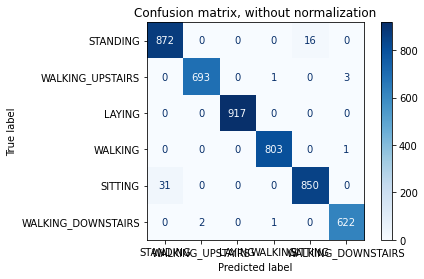

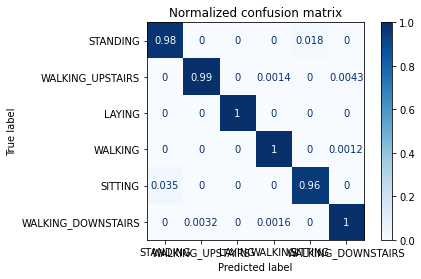

In [77]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=mapping.keys(),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
#     print(disp.confusion_matrix)

plt.show()

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(y_test, y_hat)

0.9885702410640067